Initial Dataset Overview
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

C:\Users\Vishal Boora\AppData\Local\Temp\ipykernel_2068\3891807164.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


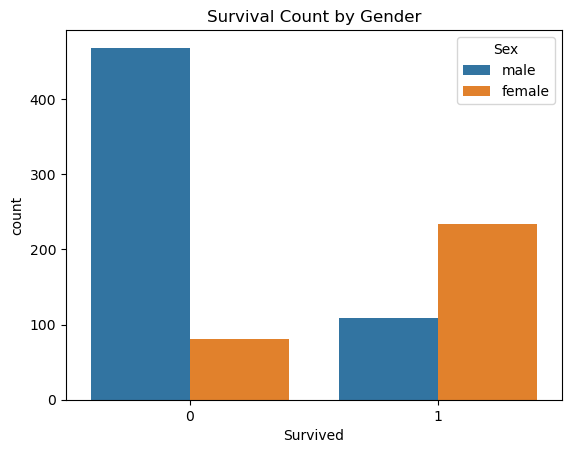

C:\Users\Vishal Boora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


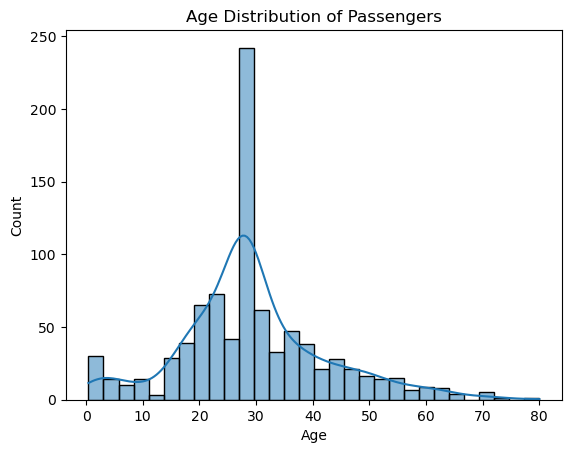


Cleaned dataset saved as "titanic_cleaned.csv"


In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Vishal Boora\Downloads\titanic.csv")
print("Initial Dataset Overview")
print(df.head())
print(df.info())
#Step 1 : Data Cleaning
#Fill missing age with median 
df['Age'].fillna(df['Age'].median(),inplace = True)
#Fill missing emabrked with mode 
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)
#Drop irrelevant coloumns 
df.drop(['Cabin','Ticket','Name'],axis = 1 , inplace = True)

#Step 2 feature engineering 
#Create a family  feature 
df['Family']= df['SibSp']+df['Parch']
#Create a boolean coloumn for alone or not
df['Alone'] = df['Family'] == 0 
#Categorize age groups 
df['AgeGroup'] = pd.cut(df['Age'],
            bins =[0,12,18,60,100],
            labels = ['child','teen','adult','senior']) 
print('\nSurvival rate by gender')
print(df.groupby('Sex')['Survived'].mean())

print('\nSurvival rate by Passenger Class')
print(df.groupby('Pclass')['Survived'].mean())

print('\nSurvival rate by Age Group')
print(df.groupby('AgeGroup')['Survived'].mean())

print('\nSurvival rate by Alone Status')
print(df.groupby('Alone')['Survived'].mean())

#Step 4 Visualization
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival Count by Gender')
plt.show()

sns.histplot(df['Age'],kde = True)
plt.title('Age Distribution of Passengers')
plt.show()

#Export cleaned data
df.to_csv("titanic_cleaned.csv",index =False)
print('\nCleaned dataset saved as "titanic_cleaned.csv"')